# Sequence Homology

**Authors:** [Tony Kabilan Okeke](mailto:tko35@drexel.edu), [Ifeanyi Osuchukwu](mailto:imo27@drexel.edu)  
**Date:** 01.31.2022

## Parse `BLAST` Query Results

In [1]:
# Imports
import matplotlib.pyplot as plt
import re
from Bio.Blast import NCBIXML

In [2]:
# Load Query Results
with open("ptn_query_report.xml", 'r') as file:
  # Retrieve alignment records
  records = next(NCBIXML.parse(file))

### Top Protein Hit

Print the name of the top protein hit (Hits were ordered by alignment score).

In [3]:
matches = re.search(r'.+?\]', records.alignments[0].hit_def)
print( "Scientific Name for Top Hit:\n{}".format(matches[0]) )

Scientific Name for Top Hit:
Chain A, 3C-like proteinase [Severe acute respiratory syndrome coronavirus 2]


### Unique Species Names of All Returned Hits

Print a unique list of species names of all the hits.

In [4]:
# Initialize empty list of species
hit_species = []

# Loop through all alignments and extract the species
for alignment in records.alignments:
  # Extract species
  species = re.search(r'\ \[(.*?)\]\ ?', alignment.title)
  # Append to list
  hit_species.append(species[1])

# Identify and sort unique species
unique_species = sorted( list( set(hit_species) ) )

# Print the unique species
print( "The following species were present in the hits:", *unique_species, sep='\n - ')

The following species were present in the hits:
 - Escherichia coli K-12
 - Feline infectious peritonitis virus
 - Feline infectious peritonitis virus (strain 79-1146)
 - Human coronavirus 229E
 - Human coronavirus HKU1 (isolate N1)
 - Human coronavirus NL63
 - Infectious bronchitis virus
 - Middle East respiratory syndrome-related coronavirus
 - Murine hepatitis virus strain A59
 - Mus musculus
 - Mycolicibacterium smegmatis
 - Paenibacillus glycanilyticus
 - Porcine epidemic diarrhea virus
 - Porcine epidemic diarrhea virus CV777
 - Porcine transmissible gastroenteritis coronavirus strain Purdue
 - SARS coronavirus BJ01
 - SARS coronavirus BJ162
 - SARS coronavirus Sino1-11
 - Severe acute respiratory syndrome coronavirus
 - Severe acute respiratory syndrome coronavirus 2
 - Severe acute respiratory syndrome-related coronavirus
 - Shewanella oneidensis MR-1
 - Transmissible gastroenteritis virus
 - Tylonycteris bat coronavirus HKU4
 - unidentified


### Top Scoring Mouse Protein Alignment

Find the top scoring hit with a mouse protein. Print the sequence alignment of the query with this mouse protein.

In [5]:
# Identify the top scoring mouse protein and retrieve the alignment information
top_mouse = records.alignments[ hit_species.index('Mus musculus') ].hsps[0]

# Print alignment
print(f'{"Query:":10s}{top_mouse.query}',
      f'{"Match:":10s}{top_mouse.match}',
      f'{"Subject:":10s}{top_mouse.sbjct}',
      sep='\n')

Query:    GCMVQVTCGTTTLNGL-WLDDVVYCPRHVICTSEDMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQN
Match:     C   +TC +  L+G  W ++  +CP H  C       P  +DL  +  N+ F     + + R  G  +Q 
Subject:  ACHSSLTCKSNWLHGWDWSEEKKHCPAHEPCLPFSYHFPTPDDLCEKIWNNTF---KASPERRNSGRCLQK


### Percent Identity Histogram

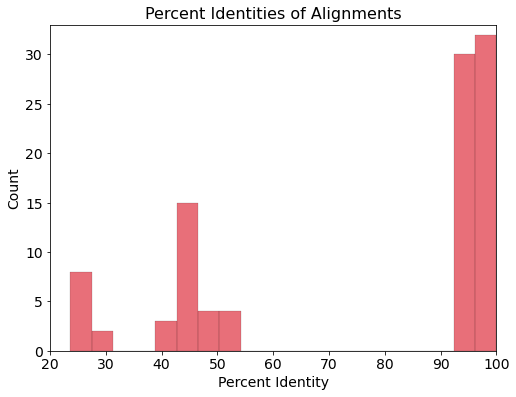

In [6]:
# Initialize list
pct_identity = []

# Compute % identities for the first hsp of each hit
for alignment in records.alignments:
  hsp = alignment.hsps[0]
  isMatch = [ m == s for (m,s) in zip(hsp.query, hsp.sbjct) ]
  pct_identity.append( sum(isMatch) / len(hsp.match) * 100 )

# Plot histogram
fig, ax = plt.subplots(figsize = (8,6))
ax.hist(pct_identity, bins=20, alpha=0.6, facecolor='#da0f20',
        edgecolor='000000', linewidth=0.2)
ax.set_xlabel('Percent Identity', fontsize=14), ax.set_xlim(20, 100)
ax.set_ylabel('Count', fontsize=14), ax.set_ylim(0, 33)
ax.set_title('Percent Identities of Alignments', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.grid(False)
plt.style.use('bmh')